# Wasting Water for Wardrobes: Analyzing Water Stress and Textile

Manufacturing in Fast Fashion

Kelbi Hall (Colorado State University)  
Chloe Rogozinski (Colorado State University)

# 1. Introduction

The fast fashion industry is among the most polluting in the world, contributing approximately 8% of total global carbon emissions and consuming 20% of all global wastewater about 79 trillion liters (Bailey et al., 2022). As demand grows, many companies outsource production to low- and middle-income countries due to cheaper labor and manufacturing costs, which in turn drives down prices and boosts consumer appeal. According to The Environmental Impacts of Fast Fashion on Water Quality, brands today release twice as many collections as they did before the 2000s. With lower quality and cost, garments are consumed and discarded more rapidly, accelerating water usage and waste (Bailey et al., 2022). Chemical use in textile production also poses significant environmental threats. Pesticides used in cotton farming lead to runoff that introduces excessive nutrients into waterways, resulting in dead zones caused by algal blooms. Additionally, fabric dyeing processes account for 17–20% of industrial water pollution globally due to the release of hazardous chemicals (Bildirici et al., 2024). According to the World Trade Organization’s 2022 analysis, China is the largest global textile exporter, accounting for 31.7% of exports. Bangladesh and India follow with 7.9% and 3.1% respectively (Bildirici et al., 2024). This project focuses on water-stressed areas in these three major textile-producing countries. China, with 20% of the world’s population, has access to only 6% of global freshwater. Uneven distribution and widespread pollution have caused severe water scarcity in many regions (Leung, 2023). India holds 18% of the world’s population but only 4% of freshwater resources. Poor water sanitation practices leave 600 million people without reliable access to usable water (World Bank, 2023). Although Bangladesh has access to 3% of the world’s freshwater and accounts for just 2% of the global population, only 40% of its population has access to safe water. Cotton production places immense stress on freshwater availability, as growing just one pair of jeans requires 7,500–10,000 liters of water—the equivalent of what one person would drink over seven years (Bildirici et al., 2024).

Our main focus in this project is to bring into light the realities of neglectful consumption of water from the fast fashion industry in already resource scarce countries.

([Bailey, Basu, and Sharma 2022](#ref-w14071073)) ([Bildirici, Türkkahraman, and Ersin 2025](#ref-su17010069)) ([Leung 2023](#ref-leung2023china)) ([World Bank 2022](#ref-worldbank2022india)) ([World Bank 2023a](#ref-worldbank2023freshwater)) ([World Bank 2023b](#ref-worldbank2023textiles))

# 2. Data/ Materials

This project used two datasets from the World Bank Open Data portal.

The first, “Freshwater withdrawals as a proportion of available freshwater resources” ([World Bank 2023a](#ref-worldbank2023freshwater)) reports national water stress levels as the percentage of renewable freshwater resources withdrawn each year.

The second dataset, “Textile manufacturing, value added (% of manufacturing)”([World Bank 2023b](#ref-worldbank2023textiles)), measures the proportion of total manufacturing value attributed to the textile industry by country and year.

Both datasets were downloaded as Excel files and imported into R. The data were reshaped from wide to long format using the pivot_longer() function and then merged by Country Name, Country Code, and Year. We removed rows with missing values as needed and converted the Year column to numeric. No values were filled in or estimated during this process. For some visualizations, we filtered out countries with water stress values above 300 percent to minimize the influence of extreme outliers.

# 3. Methods

To examine the relationship between textile manufacturing and water stress, we used a mix of visual analyses and statistical tests that allowed us to explore patterns across countries and over time. We started with scatterplots to visually assess whether countries with higher textile output also experienced higher water stress, focusing on the year 2018 for a clearer snapshot. Filtering out extreme water stress values helped ensure that most countries were visible and not overshadowed by outliers. We highlighted key countries, including top combined offenders and major textile producers, to compare expected and actual results. To understand how these trends changed over time, we used time series visualizations for India, China, and Bangladesh. This helped us explore whether shifts in textile output aligned with changes in water stress. Pearson correlation tests were then applied to measure the strength of the relationship between textile manufacturing and water stress in these countries, offering a statistical complement to the visual trends. A global correlation test across all countries and years was also conducted to see if any broader relationship existed. Lastly, we summarized average textile output and water stress levels to identify the top five countries in each category, which provided context for our findings and helped compare global patterns. Together, these methods allowed us to explore the data from multiple angles and strengthen our analysis.

# 4. Results

The results showed that there is not a strong or consistent relationship between textile manufacturing and water stress at the national level. In 2018, countries like Egypt, Uzbekistan, and Sri Lanka had the highest combined levels of textile output and water stress, while major fast fashion producers like India, China, and Bangladesh did not. Time series analysis revealed that in India and China, water stress increased over time even as textile manufacturing declined, suggesting other factors such as agriculture, population growth, or climate conditions are driving water scarcity. Bangladesh had high textile manufacturing and low water stress, but incomplete data for many years limits what we can conclude. Overall, correlation tests confirmed these trends, with strong negative correlations in India and China and a very weak global correlation. The top countries for textile production and those with the highest water stress were mostly different, reinforcing that water stress is likely shaped by broader environmental and economic conditions rather than textile manufacturing alone.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:
# Preview the textile manufacturing data
textiles_long %>%
  filter(!is.na(TextileValue)) %>%
  head(10)

# A tibble: 10 × 4
   `Country Name` `Country Code` Year  TextileValue
   <chr>          <chr>          <chr>        <dbl>
 1 Albania        ALB            2010          26.4
 2 Albania        ALB            2011          31.5
 3 Albania        ALB            2012          27.3
 4 Albania        ALB            2013          31.1
 5 Albania        ALB            2014          32.7
 6 Albania        ALB            2015          32.4
 7 Albania        ALB            2016          33.7
 8 Albania        ALB            2017          34.9
 9 Albania        ALB            2018          36.6
10 Albania        ALB            2019          36.4

In [ ]:
# Count missing values
cat("Missing Water Stress values:", sum(is.na(water_long$WaterStress)), "\n")

Missing Water Stress values: 11000 

Missing Textile Manufacturing values: 13692 

## 4.1 2018 Scatter plot

`geom_smooth()` using formula = 'y ~ x'

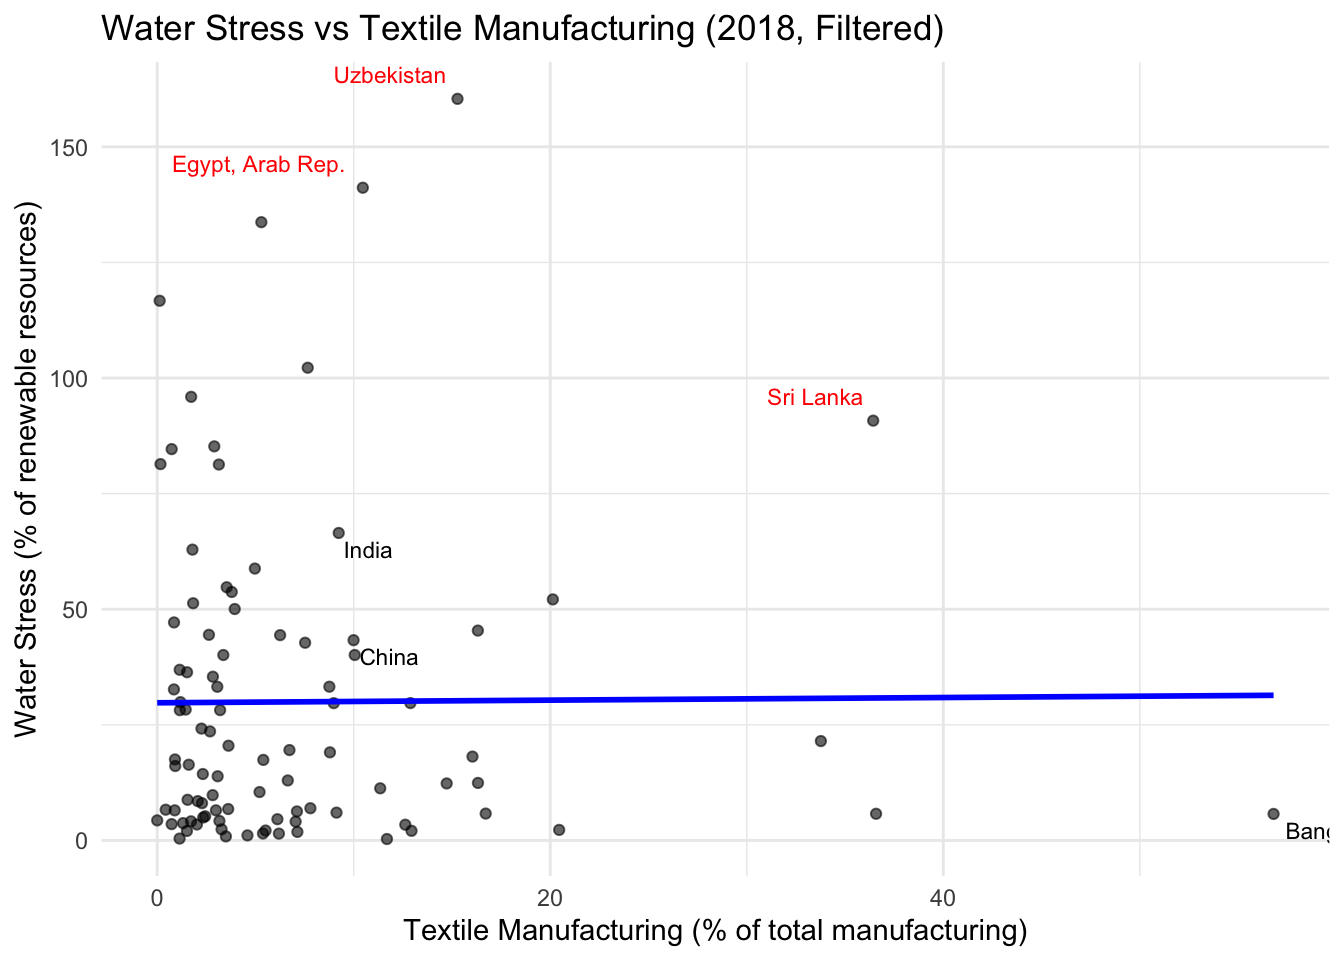

In [ ]:
# Filter 2018 data
scatter_data_2018_filtered <- combined %>%
  filter(Year == 2018, !is.na(WaterStress), !is.na(TextileValue), WaterStress < 300)

# Top 3 countries by composite score (TextileValue * WaterStress)
top_countries_2018 <- scatter_data_2018_filtered %>%
  mutate(score = TextileValue * WaterStress) %>%
  arrange(desc(score)) %>%
  slice(1:3)

# Scatterplot
ggplot(scatter_data_2018_filtered, aes(x = TextileValue, y = WaterStress)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  geom_text(data = top_countries_2018, aes(label = `Country Name`), vjust = -1, hjust = 1.1, size = 3, color = "red") +
  geom_text(data = filter(scatter_data_2018_filtered, `Country Name` %in% c("China", "India", "Bangladesh")),
            aes(label = `Country Name`), vjust = 1.5, hjust = -0.1, size = 3) +
  labs(title = "Water Stress vs Textile Manufacturing (2018, Filtered)",
       x = "Textile Manufacturing (% of total manufacturing)",
       y = "Water Stress (% of renewable resources)") +
  theme_minimal()

**Figure 1.** Scatter plot showing the relationship between water stress levels and textile export values by country.

## 4.2 Time Series Plot

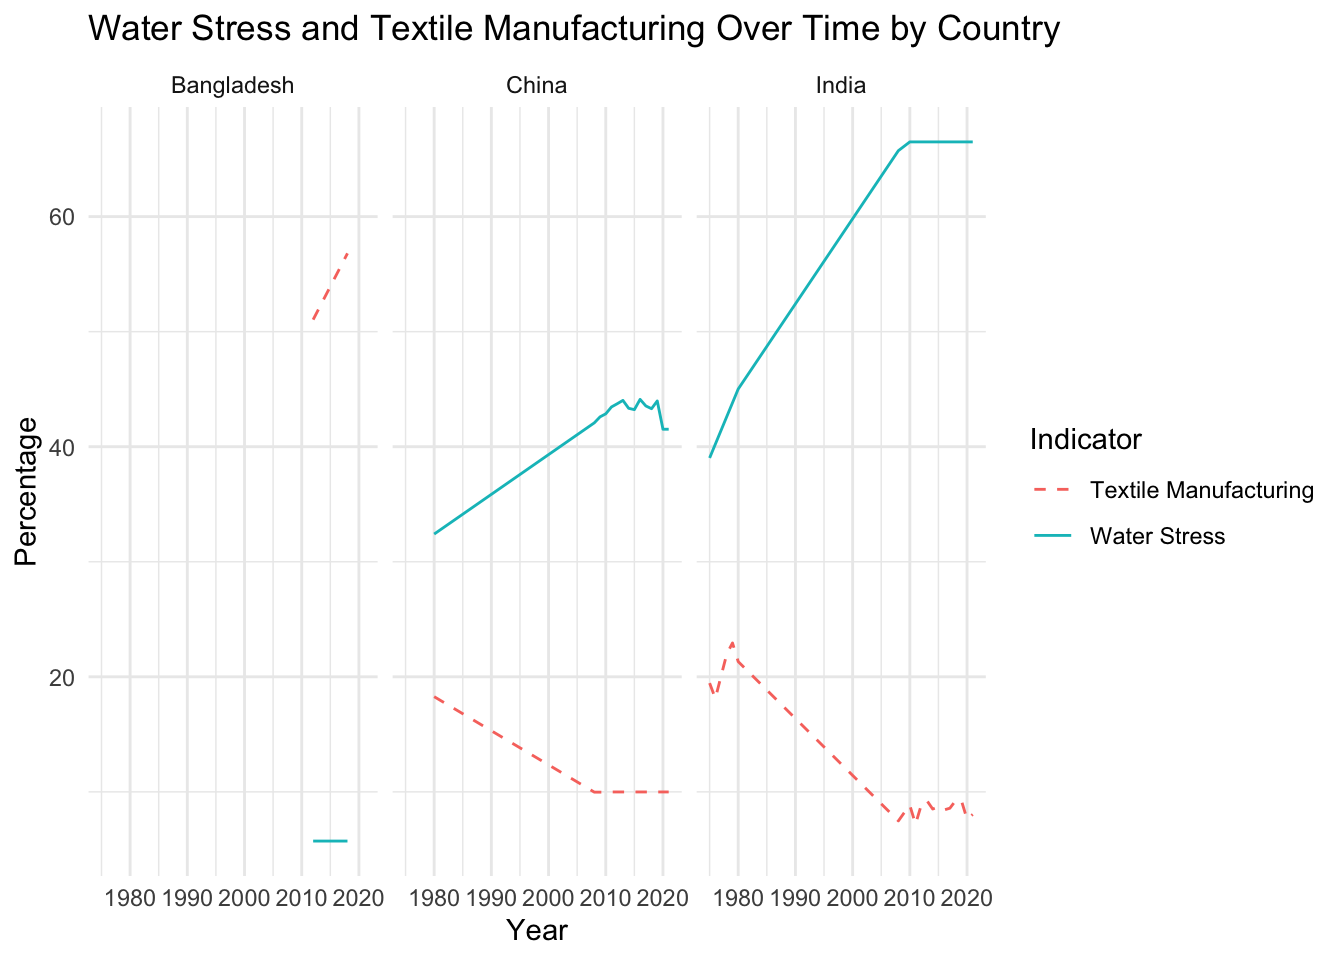

In [ ]:
time_series_data <- combined %>%
  filter(`Country Name` %in% c("India", "China", "Bangladesh"), !is.na(WaterStress), !is.na(TextileValue))

ggplot(time_series_data, aes(x = Year)) +
  geom_line(aes(y = WaterStress, color = "Water Stress"), linetype = "solid") +
  geom_line(aes(y = TextileValue, color = "Textile Manufacturing"), linetype = "dashed") +
  facet_wrap(~ `Country Name`) +
  labs(title = "Water Stress and Textile Manufacturing Over Time by Country",
       y = "Percentage",
       x = "Year",
       color = "Indicator") +
  theme_minimal()

**Figure 2.** Time series of annual textile export values for China, India, and Bangladesh.

## 4.3 Correlation Tests

In [ ]:
# India correlation
india_data <- combined %>% filter(`Country Name` == "India", !is.na(WaterStress), !is.na(TextileValue))
cor.test(india_data$TextileValue, india_data$WaterStress)


    Pearson's product-moment correlation

data:  india_data$TextileValue and india_data$WaterStress
t = -15.753, df = 18, p-value = 5.662e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9865618 -0.9133402
sample estimates:
       cor 
-0.9655946 


    Pearson's product-moment correlation

data:  china_data$TextileValue and china_data$WaterStress
t = -11.808, df = 13, p-value = 2.535e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9857302 -0.8707596
sample estimates:
       cor 
-0.9564088 

## 4.4 Top 5 Countries by Average Textile Output and Water Stress

In [ ]:
country_averages <- combined %>%
  group_by(`Country Name`) %>%
  summarize(avg_textile = mean(TextileValue, na.rm = TRUE),
            avg_water_stress = mean(WaterStress, na.rm = TRUE)) %>%
  ungroup()

top_textile <- country_averages %>% arrange(desc(avg_textile)) %>% slice(1:5)

top_water_stress <- country_averages %>% arrange(desc(avg_water_stress)) %>% slice(1:5)

top_textile

# A tibble: 5 × 3
  `Country Name`       avg_textile avg_water_stress
  <chr>                      <dbl>            <dbl>
1 Macao SAR, China            55.5           NaN   
2 Bangladesh                  42.3             5.72
3 Syrian Arab Republic        37.4           105.  
4 Cambodia                    37.2             1.04
5 Pakistan                    32.9           105.  

# A tibble: 5 × 3
  `Country Name`       avg_textile avg_water_stress
  <chr>                      <dbl>            <dbl>
1 Kuwait                      4.55            2612.
2 United Arab Emirates        3.42            1373.
3 Saudi Arabia                3.28             866.
4 Libya                       6.38             603.
5 Qatar                       1.52             358.

## 4.5 Global Correlation Test

In [ ]:
global_corr_data <- combined %>% filter(!is.na(WaterStress), !is.na(TextileValue))
cor.test(global_corr_data$TextileValue, global_corr_data$WaterStress)


    Pearson's product-moment correlation

data:  global_corr_data$TextileValue and global_corr_data$WaterStress
t = -3.5162, df = 1853, p-value = 0.0004483
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.12645593 -0.03603367
sample estimates:
        cor 
-0.08141232 

# 5. Discussion

This study aimed to examine the relationship between textile manufacturing and water stress across countries, focusing particularly on India, China, and Bangladesh—nations commonly associated with fast fashion production. The hypothesis was that higher textile output would correlate with higher water stress at the national level due to the water-intensive nature of cotton farming, textile dyeing, and fabric production. However, the results of this analysis reveal a much more complex relationship, with textile output alone not consistently explaining national water stress patterns.

The scatterplot analysis for 2018, after filtering extreme water stress outliers (above 300%), highlighted that Egypt, Uzbekistan, and Sri Lanka had the highest combined textile output and water stress, while China, India, and Bangladesh—although top textile producers—did not exhibit the highest water stress levels. This finding challenges the assumption that fast fashion-heavy nations automatically face higher water pressures.

This outcome underscores that water stress is influenced by multiple factors beyond textile manufacturing. For instance, agriculture—particularly water-intensive crops—often consumes far more water than industry. Climate variability, population growth, urbanization, and government water policies all contribute to water demand and scarcity. The case of Bangladesh illustrates this well. Despite being a global leader in textile exports, Bangladesh maintains relatively low water stress (5.7% average), while other textile producers like Syria and Pakistan experience high water stress (above 100%), withdrawing freshwater at or beyond renewable levels.

The time series analysis for India, China, and Bangladesh provided additional insight. India’s water stress has steadily increased over time, despite a decline in textile manufacturing output. This suggests that agriculture, particularly rice and sugarcane production, along with urban water demands and climate-related shortages, are likely driving water stress in India. China’s water stress remained relatively stable, even as textile output decreased gradually. Bangladesh showed limited data, but available trends suggested low water stress relative to its textile manufacturing levels.

These trends were further reinforced by correlation analyses. India and China both exhibited strong negative correlations between textile manufacturing and water stress (India: r = -0.97, China: r = -0.96, both p \< 0.001). This means that as textile output declined, water stress increased in both countries. While counterintuitive, these results align with the time series findings, suggesting that other sectors or broader environmental changes—such as urbanization or climate factors—are driving national water pressures more than textile output.

For Bangladesh, the correlation test could not be performed due to limited overlapping data between the two variables. This reflects one of the challenges in working with global datasets—inconsistent data availability across countries and years. Even though Bangladesh is a major textile producer, its water stress patterns could not be fully assessed due to gaps in reporting.

Despite the limitations in water stress data for Bangladesh, external literature highlights the environmental impact of its textile sector. For example, a 2024 study titled Water Pollution and the Textile Industry in Bangladesh: Flawed Corporate Practices or Restrictive Opportunities? ([Sakamoto et al. 2019](#ref-article)) details how untreated wastewater from dyeing facilities has severely degraded water quality in Dhaka’s rivers. The study argues that while global brands pressure factories to reduce pollution, local infrastructure and regulatory gaps often leave producers with limited means to adopt cleaner practices. This reinforces the idea that low national water stress levels can mask serious regional water quality issues, especially in industrial clusters

Expanding the scope to a global analysis, a correlation test across all countries and years produced a very weak negative correlation (r = -0.08, p \< 0.001) between textile manufacturing and water stress. While statistically significant because of the large sample size, the relationship is practically negligible, suggesting that globally, textile output is not a reliable predictor of water stress. This supports the idea that local factors, such as climate, agricultural practices, and water policies, heavily influence national water conditions.

To further explore this relationship, the study examined the top five countries by average textile manufacturing output and average water stress. Among the top textile producers were Macao SAR (China), Bangladesh, Syria, Cambodia, and Pakistan. These countries had varying levels of water stress, with Bangladesh maintaining low water stress and Syria and Pakistan experiencing high water stress (above 100%).

Conversely, the top five water-stressed countries—Kuwait, United Arab Emirates, Saudi Arabia, Libya, and Qatar—are predominantly arid nations with extremely high water stress levels (ranging from 358% to 2612%). However, these countries reported low textile manufacturing output (below 6.5%). This contrast demonstrates that water scarcity in these regions is likely driven by climate conditions and urban/agricultural demands, rather than textile production.

These findings align with previous research emphasizing the need for context-specific analyses when addressing water stress. For example, countries like India and China may face water shortages driven by agriculture, urban expansion, and climate variability, whereas Middle Eastern nations contend with naturally scarce water supplies.

This study challenges the narrative that fast fashion alone is a primary contributor to water stress. While textile manufacturing certainly has a significant environmental footprint, the data shows that other sectors, particularly agriculture, often exert greater pressure on water resources. Water stress is a multifaceted issue, influenced by sectoral water demands, regional climates, technological efficiencies, and policy decisions.

The analysis also highlighted data limitations, particularly with Bangladesh, where incomplete records prevented a full correlation analysis. This reflects a broader challenge with global environmental datasets: inconsistent data collection and reporting. Reliable, comprehensive data is crucial for accurate assessments of global resource use patterns. Improvements in data standardization and reporting are essential for advancing research and informing water management strategies.

Despite these limitations, this study offers valuable insights into the complex relationship between industrial production and water scarcity. While textile manufacturing is often targeted in sustainability conversations, this research suggests the need for multi-sectoral approaches to water management, taking into account agriculture, urban growth, industrial practices, and climate adaptation.

Future research could expand on these findings by incorporating regional or watershed-level data to assess localized water stress. Additionally, integrating water quality data—particularly related to pollution from textile dyeing processes—could provide a more comprehensive picture of the fast fashion industry’s water impacts. Supply chain analyses could also help trace water usage and pollution footprints across different stages of textile production, offering a more granular understanding of the industry’s true water footprint.

In summary, this study contributes to a growing body of research emphasizing that global environmental issues cannot be reduced to single-sector explanations. Textile manufacturing is an important part of the conversation, but water stress must be understood within a broader socio-environmental context that considers multiple drivers, including agriculture, climate, and population dynamics.

# 6. Conclusion

This study set out to explore the relationship between textile manufacturing and water stress across countries, focusing on major fast fashion producers such as India, China, and Bangladesh. While textile production is known for its high water consumption and pollution potential, the analysis revealed that it is not a consistent driver of national water stress. Both the scatterplot and time series analyses, along with correlation tests, showed that water stress levels do not reliably correlate with textile manufacturing output.

In India and China, strong negative correlations indicated that water stress has increased even as textile manufacturing output declined, suggesting that other sectors, particularly agriculture and urban development, play larger roles in shaping national water pressures. At the global level, a very weak negative correlation further emphasized that textile output alone is not a reliable predictor of water stress.

The top textile-producing countries and the top water-stressed nations were largely distinct, reinforcing that regional factors such as climate, resource management, and sectoral water use have greater influence on water scarcity.

These findings highlight the complexity of water resource management and suggest that addressing global water stress requires a multi-sectoral approach, focusing not only on industrial output, but also on agriculture, urbanization, and climate adaptation strategies. While textile production remains a key area for sustainability improvements, including reducing water pollution from dyeing and improving water efficiency, it should be understood as part of a broader system of water use.

Moving forward, improving data completeness and consistency across countries will be critical to fully understanding global water stress patterns. Future research should also explore regional water stress dynamics, supply chain impacts, and water quality to build a more comprehensive view of the fast fashion industry’s environmental footprint.

In conclusion, while fast fashion remains a significant environmental concern, this study emphasizes that water stress is a multi-dimensional challenge requiring holistic solutions. Sustainable water management will depend on integrating sectoral demands, addressing local contexts, and collaborating across industries to ensure that water resources are protected for both current and future generations.

```` markdown
---
title: "Wasting Water for Wardrobes: Analyzing Water Stress and Textile Manufacturing in Fast Fashion"
authors:
  - name: Kelbi Hall
    affiliation: Colorado State University 
    roles: writing
    corresponding: true
  - name: Chloe Rogozinski
    affiliation: Colorado State University
    roles: writing
    corresponding: false

bibliography: references.bib
format:
  html:
    theme: Lux
    toc: true
    toc-depth: 3
    toc-location: left
    number-sections: true
    code-fold: true
    code-tools: true
editor: 
  markdown: 
    wrap: 72
---

# Introduction

The fast fashion industry is among the most polluting in the world,
contributing approximately 8% of total global carbon emissions and
consuming 20% of all global wastewater about 79 trillion liters (Bailey
et al., 2022). As demand grows, many companies outsource production to
low- and middle-income countries due to cheaper labor and manufacturing
costs, which in turn drives down prices and boosts consumer appeal.
According to The Environmental Impacts of Fast Fashion on Water Quality,
brands today release twice as many collections as they did before the
2000s. With lower quality and cost, garments are consumed and discarded
more rapidly, accelerating water usage and waste (Bailey et al., 2022).
Chemical use in textile production also poses significant environmental
threats. Pesticides used in cotton farming lead to runoff that
introduces excessive nutrients into waterways, resulting in dead zones
caused by algal blooms. Additionally, fabric dyeing processes account
for 17–20% of industrial water pollution globally due to the release of
hazardous chemicals (Bildirici et al., 2024). According to the World
Trade Organization’s 2022 analysis, China is the largest global textile
exporter, accounting for 31.7% of exports. Bangladesh and India follow
with 7.9% and 3.1% respectively (Bildirici et al., 2024). This project
focuses on water-stressed areas in these three major textile-producing
countries. China, with 20% of the world’s population, has access to only
6% of global freshwater. Uneven distribution and widespread pollution
have caused severe water scarcity in many regions (Leung, 2023). India
holds 18% of the world’s population but only 4% of freshwater resources.
Poor water sanitation practices leave 600 million people without
reliable access to usable water (World Bank, 2023). Although Bangladesh
has access to 3% of the world’s freshwater and accounts for just 2% of
the global population, only 40% of its population has access to safe
water. Cotton production places immense stress on freshwater
availability, as growing just one pair of jeans requires 7,500–10,000
liters of water—the equivalent of what one person would drink over seven
years (Bildirici et al., 2024).

Our main focus in this project is to bring into light the realities of
neglectful consumption of water from the fast fashion industry in
already resource scarce countries. 

[@w14071073] [@su17010069] [@leung2023china] [@worldbank2022india]
[@worldbank2023freshwater] [@worldbank2023textiles]


# Data/ Materials 

This project used two datasets from the World Bank Open Data portal.

The first, “Freshwater withdrawals as a proportion of available freshwater resources” [@worldbank2023freshwater]
reports national water stress levels as the percentage of renewable freshwater resources withdrawn each year. 

The second dataset, “Textile manufacturing, value added (% of manufacturing)”[@worldbank2023textiles], measures the proportion of total manufacturing value attributed to the textile industry by country and year.

Both datasets were downloaded as Excel files and imported into R. The data were reshaped from wide to long format using the pivot_longer() function and then merged by Country Name, Country Code, and Year. We removed rows with missing values as needed and converted the Year column to numeric. No values were filled in or estimated during this process. For some visualizations, we filtered out countries with water stress values above 300 percent to minimize the influence of extreme outliers.

# Methods

To examine the relationship between textile manufacturing and water stress, we used a mix of visual analyses and statistical tests that allowed us to explore patterns across countries and over time. We started with scatterplots to visually assess whether countries with higher textile output also experienced higher water stress, focusing on the year 2018 for a clearer snapshot. Filtering out extreme water stress values helped ensure that most countries were visible and not overshadowed by outliers. We highlighted key countries, including top combined offenders and major textile producers, to compare expected and actual results.
To understand how these trends changed over time, we used time series visualizations for India, China, and Bangladesh. This helped us explore whether shifts in textile output aligned with changes in water stress. Pearson correlation tests were then applied to measure the strength of the relationship between textile manufacturing and water stress in these countries, offering a statistical complement to the visual trends. A global correlation test across all countries and years was also conducted to see if any broader relationship existed. Lastly, we summarized average textile output and water stress levels to identify the top five countries in each category, which provided context for our findings and helped compare global patterns. Together, these methods allowed us to explore the data from multiple angles and strengthen our analysis.

# Results

The results showed that there is not a strong or consistent relationship between textile manufacturing and water stress at the national level. In 2018, countries like Egypt, Uzbekistan, and Sri Lanka had the highest combined levels of textile output and water stress, while major fast fashion producers like India, China, and Bangladesh did not. Time series analysis revealed that in India and China, water stress increased over time even as textile manufacturing declined, suggesting other factors such as agriculture, population growth, or climate conditions are driving water scarcity. Bangladesh had high textile manufacturing and low water stress, but incomplete data for many years limits what we can conclude. Overall, correlation tests confirmed these trends, with strong negative correlations in India and China and a very weak global correlation. The top countries for textile production and those with the highest water stress were mostly different, reinforcing that water stress is likely shaped by broader environmental and economic conditions rather than textile manufacturing alone.

quarto-executable-code-5450563D

```r
library(tidyverse)
library(readxl)
library(dplyr)

water <- read_excel("data/API_ER.H2O.FWST.ZS_DS2_en_excel_v2_14076.xls", skip = 3)
textiles <- read_excel("data/API_NV.MNF.TXTL.ZS.UN_DS2_en_excel_v2_26490.xls", skip = 3)

water_long <- water %>%
  pivot_longer(cols = matches("^\\d{4}$"), names_to = "Year", values_to = "WaterStress") %>%
  select(`Country Name`, `Country Code`, Year, WaterStress)

textiles_long <- textiles %>%
  pivot_longer(cols = matches("^\\d{4}$"), names_to = "Year", values_to = "TextileValue") %>%
  select(`Country Name`, `Country Code`, Year, TextileValue)

combined <- left_join(water_long, textiles_long, by = c("Country Name", "Country Code", "Year")) %>%
  mutate(Year = as.numeric(Year))

```

quarto-executable-code-5450563D

```r
# Preview the textile manufacturing data
textiles_long %>%
  filter(!is.na(TextileValue)) %>%
  head(10)
```

quarto-executable-code-5450563D

```r
# Count missing values
cat("Missing Water Stress values:", sum(is.na(water_long$WaterStress)), "\n")
cat("Missing Textile Manufacturing values:", sum(is.na(textiles_long$TextileValue)), "\n")
```

## 2018 Scatter plot
quarto-executable-code-5450563D

```r
# Filter 2018 data
scatter_data_2018_filtered <- combined %>%
  filter(Year == 2018, !is.na(WaterStress), !is.na(TextileValue), WaterStress < 300)

# Top 3 countries by composite score (TextileValue * WaterStress)
top_countries_2018 <- scatter_data_2018_filtered %>%
  mutate(score = TextileValue * WaterStress) %>%
  arrange(desc(score)) %>%
  slice(1:3)

# Scatterplot
ggplot(scatter_data_2018_filtered, aes(x = TextileValue, y = WaterStress)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  geom_text(data = top_countries_2018, aes(label = `Country Name`), vjust = -1, hjust = 1.1, size = 3, color = "red") +
  geom_text(data = filter(scatter_data_2018_filtered, `Country Name` %in% c("China", "India", "Bangladesh")),
            aes(label = `Country Name`), vjust = 1.5, hjust = -0.1, size = 3) +
  labs(title = "Water Stress vs Textile Manufacturing (2018, Filtered)",
       x = "Textile Manufacturing (% of total manufacturing)",
       y = "Water Stress (% of renewable resources)") +
  theme_minimal()
```
**Figure 1.** Scatter plot showing the relationship between water stress levels and textile export values by country.


## Time Series Plot
quarto-executable-code-5450563D

```r
time_series_data <- combined %>%
  filter(`Country Name` %in% c("India", "China", "Bangladesh"), !is.na(WaterStress), !is.na(TextileValue))

ggplot(time_series_data, aes(x = Year)) +
  geom_line(aes(y = WaterStress, color = "Water Stress"), linetype = "solid") +
  geom_line(aes(y = TextileValue, color = "Textile Manufacturing"), linetype = "dashed") +
  facet_wrap(~ `Country Name`) +
  labs(title = "Water Stress and Textile Manufacturing Over Time by Country",
       y = "Percentage",
       x = "Year",
       color = "Indicator") +
  theme_minimal()
```
**Figure 2.** Time series of annual textile export values for China, India, and Bangladesh.

## Correlation Tests

quarto-executable-code-5450563D

```r
# India correlation
india_data <- combined %>% filter(`Country Name` == "India", !is.na(WaterStress), !is.na(TextileValue))
cor.test(india_data$TextileValue, india_data$WaterStress)

# China correlation
china_data <- combined %>% filter(`Country Name` == "China", !is.na(WaterStress), !is.na(TextileValue))
cor.test(china_data$TextileValue, china_data$WaterStress)

# Bangladesh correlation
bangladesh_data <- combined %>% filter(`Country Name` == "Bangladesh", !is.na(WaterStress), !is.na(TextileValue))

```

## Top 5 Countries by Average Textile Output and Water Stress

quarto-executable-code-5450563D

```r
country_averages <- combined %>%
  group_by(`Country Name`) %>%
  summarize(avg_textile = mean(TextileValue, na.rm = TRUE),
            avg_water_stress = mean(WaterStress, na.rm = TRUE)) %>%
  ungroup()

top_textile <- country_averages %>% arrange(desc(avg_textile)) %>% slice(1:5)

top_water_stress <- country_averages %>% arrange(desc(avg_water_stress)) %>% slice(1:5)

top_textile
top_water_stress

```

## Global Correlation Test

quarto-executable-code-5450563D

```r
global_corr_data <- combined %>% filter(!is.na(WaterStress), !is.na(TextileValue))
cor.test(global_corr_data$TextileValue, global_corr_data$WaterStress)

```

# Discussion

This study aimed to examine the relationship between textile
manufacturing and water stress across countries, focusing particularly
on India, China, and Bangladesh—nations commonly associated with fast
fashion production. The hypothesis was that higher textile output would
correlate with higher water stress at the national level due to the
water-intensive nature of cotton farming, textile dyeing, and fabric
production. However, the results of this analysis reveal a much more
complex relationship, with textile output alone not consistently
explaining national water stress patterns.

The scatterplot analysis for 2018, after filtering extreme water stress
outliers (above 300%), highlighted that Egypt, Uzbekistan, and Sri Lanka
had the highest combined textile output and water stress, while China,
India, and Bangladesh—although top textile producers—did not exhibit the
highest water stress levels. This finding challenges the assumption that
fast fashion-heavy nations automatically face higher water pressures.

This outcome underscores that water stress is influenced by multiple
factors beyond textile manufacturing. For instance,
agriculture—particularly water-intensive crops—often consumes far more
water than industry. Climate variability, population growth,
urbanization, and government water policies all contribute to water
demand and scarcity. The case of Bangladesh illustrates this well.
Despite being a global leader in textile exports, Bangladesh maintains
relatively low water stress (5.7% average), while other textile
producers like Syria and Pakistan experience high water stress (above
100%), withdrawing freshwater at or beyond renewable levels.

The time series analysis for India, China, and Bangladesh provided
additional insight. India’s water stress has steadily increased over
time, despite a decline in textile manufacturing output. This suggests
that agriculture, particularly rice and sugarcane production, along with
urban water demands and climate-related shortages, are likely driving
water stress in India. China’s water stress remained relatively stable,
even as textile output decreased gradually. Bangladesh showed limited
data, but available trends suggested low water stress relative to its
textile manufacturing levels.

These trends were further reinforced by correlation analyses. India and
China both exhibited strong negative correlations between textile
manufacturing and water stress (India: r = -0.97, China: r = -0.96, both
p \< 0.001). This means that as textile output declined, water stress
increased in both countries. While counterintuitive, these results align
with the time series findings, suggesting that other sectors or broader
environmental changes—such as urbanization or climate factors—are
driving national water pressures more than textile output.

For Bangladesh, the correlation test could not be performed due to
limited overlapping data between the two variables. This reflects one of
the challenges in working with global datasets—inconsistent data
availability across countries and years. Even though Bangladesh is a
major textile producer, its water stress patterns could not be fully
assessed due to gaps in reporting.

Despite the limitations in water stress data for Bangladesh, external literature highlights the environmental impact of its textile sector. For example, a 2024 study titled Water Pollution and the Textile Industry in Bangladesh: Flawed Corporate Practices or Restrictive Opportunities? [@article] details how untreated wastewater from dyeing facilities has severely degraded water quality in Dhaka’s rivers. The study argues that while global brands pressure factories to reduce pollution, local infrastructure and regulatory gaps often leave producers with limited means to adopt cleaner practices. This reinforces the idea that low national water stress levels can mask serious regional water quality issues, especially in industrial clusters

Expanding the scope to a global analysis, a correlation test across all
countries and years produced a very weak negative correlation (r =
-0.08, p \< 0.001) between textile manufacturing and water stress. While
statistically significant because of the large sample size, the
relationship is practically negligible, suggesting that globally,
textile output is not a reliable predictor of water stress. This
supports the idea that local factors, such as climate, agricultural
practices, and water policies, heavily influence national water
conditions.

To further explore this relationship, the study examined the top five
countries by average textile manufacturing output and average water
stress. Among the top textile producers were Macao SAR (China),
Bangladesh, Syria, Cambodia, and Pakistan. These countries had varying
levels of water stress, with Bangladesh maintaining low water stress and
Syria and Pakistan experiencing high water stress (above 100%).

Conversely, the top five water-stressed countries—Kuwait, United Arab
Emirates, Saudi Arabia, Libya, and Qatar—are predominantly arid nations
with extremely high water stress levels (ranging from 358% to 2612%).
However, these countries reported low textile manufacturing output
(below 6.5%). This contrast demonstrates that water scarcity in these
regions is likely driven by climate conditions and urban/agricultural
demands, rather than textile production.

These findings align with previous research emphasizing the need for
context-specific analyses when addressing water stress. For example,
countries like India and China may face water shortages driven by
agriculture, urban expansion, and climate variability, whereas Middle
Eastern nations contend with naturally scarce water supplies.

This study challenges the narrative that fast fashion alone is a primary
contributor to water stress. While textile manufacturing certainly has a
significant environmental footprint, the data shows that other sectors,
particularly agriculture, often exert greater pressure on water
resources. Water stress is a multifaceted issue, influenced by sectoral
water demands, regional climates, technological efficiencies, and policy
decisions.

The analysis also highlighted data limitations, particularly with
Bangladesh, where incomplete records prevented a full correlation
analysis. This reflects a broader challenge with global environmental
datasets: inconsistent data collection and reporting. Reliable,
comprehensive data is crucial for accurate assessments of global
resource use patterns. Improvements in data standardization and
reporting are essential for advancing research and informing water
management strategies.

Despite these limitations, this study offers valuable insights into the
complex relationship between industrial production and water scarcity.
While textile manufacturing is often targeted in sustainability
conversations, this research suggests the need for multi-sectoral
approaches to water management, taking into account agriculture, urban
growth, industrial practices, and climate adaptation.

Future research could expand on these findings by incorporating regional
or watershed-level data to assess localized water stress. Additionally,
integrating water quality data—particularly related to pollution from
textile dyeing processes—could provide a more comprehensive picture of
the fast fashion industry’s water impacts. Supply chain analyses could
also help trace water usage and pollution footprints across different
stages of textile production, offering a more granular understanding of
the industry’s true water footprint.

In summary, this study contributes to a growing body of research
emphasizing that global environmental issues cannot be reduced to
single-sector explanations. Textile manufacturing is an important part
of the conversation, but water stress must be understood within a
broader socio-environmental context that considers multiple drivers,
including agriculture, climate, and population dynamics.

# Conclusion

This study set out to explore the relationship between textile
manufacturing and water stress across countries, focusing on major fast
fashion producers such as India, China, and Bangladesh. While textile
production is known for its high water consumption and pollution
potential, the analysis revealed that it is not a consistent driver of
national water stress. Both the scatterplot and time series analyses,
along with correlation tests, showed that water stress levels do not
reliably correlate with textile manufacturing output.

In India and China, strong negative correlations indicated that water
stress has increased even as textile manufacturing output declined,
suggesting that other sectors, particularly agriculture and urban
development, play larger roles in shaping national water pressures. At
the global level, a very weak negative correlation further emphasized
that textile output alone is not a reliable predictor of water stress.

The top textile-producing countries and the top water-stressed nations
were largely distinct, reinforcing that regional factors such as
climate, resource management, and sectoral water use have greater
influence on water scarcity.

These findings highlight the complexity of water resource management and
suggest that addressing global water stress requires a multi-sectoral
approach, focusing not only on industrial output, but also on
agriculture, urbanization, and climate adaptation strategies. While
textile production remains a key area for sustainability improvements,
including reducing water pollution from dyeing and improving water
efficiency, it should be understood as part of a broader system of water
use.

Moving forward, improving data completeness and consistency across
countries will be critical to fully understanding global water stress
patterns. Future research should also explore regional water stress
dynamics, supply chain impacts, and water quality to build a more
comprehensive view of the fast fashion industry’s environmental
footprint.

In conclusion, while fast fashion remains a significant environmental
concern, this study emphasizes that water stress is a multi-dimensional
challenge requiring holistic solutions. Sustainable water management
will depend on integrating sectoral demands, addressing local contexts,
and collaborating across industries to ensure that water resources are
protected for both current and future generations.
````

Bailey, K., A. Basu, and S. Sharma. 2022. “The Environmental Impacts of Fast Fashion on Water Quality: A Systematic Review.” *Water (Basel)* 14 (7): 1073. <https://doi.org/10.3390/w14071073>.

Bildirici, M., I. Türkkahraman, and Ö. Ö. Ersin. 2025. “Unraveling the Environmental Impacts of the Fashion Industry: A Fourier-Based Analysis of Pollution Dynamics and Causality Across Five Countries.” *Sustainability* 17 (1): 69. <https://doi.org/10.3390/su17010069>.

Leung, K. C. 2023. “Tackling China’s Water Shortage Crisis.” 2023. <https://earth.org/tackling-chinas-water-shortage-crisis/>.

Sakamoto, Maiko, Tofayel Ahamed, Salma Begum, and Hamidul Huq. 2019. “Water Pollution and the Textile Industry in Bangladesh: Flawed Corporate Practices or Restrictive Opportunities?” *Sustainability* 11 (April): 1951. <https://doi.org/10.3390/su11071951>.

World Bank. 2022. “How Is India Addressing Its Water Needs?” 2022. <https://www.worldbank.org/en/country/india/brief/world-water-day-2022-how-india-is-addressing-its-water-needs>.

———. 2023a. “Freshwater Withdrawal as % of Internal Resources (ER.H2O.FWST.ZS).” <https://data.worldbank.org/indicator/ER.H2O.FWST.ZS>.

———. 2023b. “Textiles and Clothing, Value Added (% of Manufacturing) (NV.MNF.TXTL.ZS.UN).” <https://data.worldbank.org/indicator/NV.MNF.TXTL.ZS.UN>.